In [163]:
# **************************************************************************** #
#                                                                              #
#                                                         :::      ::::::::    #
#                                                       :+:      :+:    :+:    #
#                                                     +:+ +:+         +:+      #
#    By: luicasad <luicasad@student.42.fr>          +#+  +:+       +#+         #
#                                                 +#+#+#+#+#+   +#+            #
#    Created: 2023/10/22 11:17:16 by luicasad          #+#    #+#              #
#    Updated: 2023/10/22 11:17:24 by luicasad         ###   ########.fr        #
#                                                                              #
# **************************************************************************** #

<span style='color:red'> Augmenta l'amplada del quadern jupyter<br> </span><span style='color:green'> Aumento el ancho del cuaderno Jupyter<br></span><span style='color:blue'> Increase the width of jupyter notebook <br></span>

In [164]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100%}</style>"))

In [165]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
home_dir = os.getcwd()
data_folder =  home_dir +'/../../data/accident/'

In [166]:
def	print_head_tail(df):
    print(df.iloc[[0,1, 2, df.index[-3],df.index[-2],df.index[-1]]])

def concat_files(data_folder:str, years: range, common_name:str )-> pd.DataFrame:

    #For each year, 
    #   create a dataframe reading a csv file.
    #   Append it to a list
    #   Create a dataframe with columns count

    files = []
    counts =[]
    for year in years:
        file = data_folder + str(year) + common_name
        df = pd.read_csv(file)
        files.append(df)
        counts.append(pd.DataFrame(data=df.count(), columns=[year]))
        print(year)
        print(df.shape)
        print(list(df))
        print(df.head(3))
        print("-" * 80)
    print(pd.concat(counts, axis=1))
    
    return pd.concat(files, ignore_index=True)

def count_NAN(df):
    """
    Count NAN values in each column of a dataset.
    Print 8 counts in per line
    """
    col_counter = 1
    for col in df.columns:
        count = df[col].isna().sum()
        if ((col_counter % 8) == 0):
            sep = "|\n"
        else:
            sep = "| "
        print("|{}[type={}] = {}".format(col,type(col),count), end=sep)
        col_counter = col_counter + 1
def minus_one(df):
    """
    Count NAN values in each column of a dataset.
    Print 8 counts in per line
    """
    col_counter = 1
    for col in df.columns[:-1]:
        count = df[df[col] == -1][col].sum()
        if ((col_counter % 8) == 0):
            sep = "|\n"
        else:
            sep = "| "
        print("|{} = {}".format(col,count), end=sep)
        col_counter = col_counter + 1

def concat_accid_files(data_folder:str, \
                       years: range, \
                       common_name:str, \
                       headers:list)-> pd.DataFrame:

    #For each year, 
    #   create a dataframe reading a csv file.
    #   Append it to a list
    #   Create a dataframe with columns count

    files = []
    counts =[]
    for year in years:
        file = data_folder + str(year) + common_name
        df = gpd.read_file(file, dtype={"Longitud":np.float64, "Latitud":np.float64})
        df.columns = headers
        files.append(df)
        counts.append(pd.DataFrame(data=df.count(), columns=[year]))
        print(year)
        print(df.shape)
        print(df.head(3))
        print("-" * 80)
    print(pd.concat(counts, axis=1))
    
    return pd.concat(files, ignore_index=True)


<span style='color:red'> Llegir i concatenar tots els fitxers d'accidents com Pandas GEO DataFrames<br> </span><span style='color:green'> Lectura y concatenación de los archivos de accidentes como Pandas GEO DataFrames<br></span><span style='color:blue'> Read and concatenate all accident files as Pandas GEO DataFrames <br></span>

In [167]:
pd.set_option("display.width", 120)
accid = concat_files(data_folder, range(2016, 2023),"_accidents_causa_conductor_gu_bcn_.csv")
#pd.concat(counts, axis=1)
print_head_tail(accid)

2016
(10510, 20)
['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ', 'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_conductor', 'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud', 'Latitud']
  Numero_expedient  Codi_districte Nom_districte  Codi_barri   Nom_barri  Codi_carrer  \
0  2016S008785                  -1    Desconegut          -1  Desconegut           -1   
1  2016S006269                  -1    Desconegut          -1  Desconegut           -1   
2  2016S005498                  -1    Desconegut          -1  Desconegut           -1   

                                          Nom_carrer Num_postal  Descripcio_dia_setmana  NK_Any  Mes_any   Nom_mes  \
0  NÚMERO 6 / A                                  ...  Desconegut                Dimarts    2016       11  Novembre   
1  ALMIRALL CERVERA / Sevilla                    ...  Descon

<span style='color:red'> Podem apreciar l'intercanvi d'informació entre el torn (Descripcio_torn ) i la causa (Descripcio_causa_conductor) i l'existència de dos noms de camps per a la causa (Descripcio_causa_conductor, Descripcio_causa_mediata): SOlucionem el problema aplicant una capçalera<br> </span><span style='color:green'> Podemos apreciar el intercambio de informacion entre el turno y la causa y la existencia de dos nombres de campos para la causa: SOlucionamoes el problema aplicando una cabecera comun a todos los archivos.<br></span><span style='color:blue'> We can see the exchange of information between the shift (Descripcio_torn) and the cause (Descripcio_causa_conductor) and the existence of two field names for the cause (Descripcio_causa_conductor, Descripcio_causa_mediata): We solve the problem by applying a common header to all files. <br></span>

In [168]:
headers= ['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', \
          'Codi_carrer', 'Nom_carrer', 'Num_postal ', 'Descripcio_dia_setmana', 'NK_Any', \
          'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Causa', 'Torn', \
          'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud', 'Latitud', 'geometry']
accid = concat_accid_files(data_folder, range(2016, 2023),"_accidents_causa_conductor_gu_bcn_.csv", headers)
#pd.concat(counts, axis=1)
print_head_tail(accid)

2016
(10510, 21)
  Numero_expedient Codi_districte Nom_districte Codi_barri   Nom_barri Codi_carrer  \
0  2016S008785                 -1    Desconegut         -1  Desconegut          -1   
1  2016S006269                 -1    Desconegut         -1  Desconegut          -1   
2  2016S005498                 -1    Desconegut         -1  Desconegut          -1   

                                          Nom_carrer Num_postal  Descripcio_dia_setmana NK_Any  ...   Nom_mes Dia_mes  \
0  NÚMERO 6 / A                                  ...  Desconegut                Dimarts   2016  ...  Novembre      15   
1  ALMIRALL CERVERA / Sevilla                    ...  Desconegut              Divendres   2016  ...     Agost      12   
2  NÚMERO 3 / E                                  ...  Desconegut               Dimecres   2016  ...    Juliol      13   

  Hora_dia                         Causa  Torn Coordenada_UTM_X_ED50 Coordenada_UTM_Y_ED50          Longitud  \
0       22       Desobeir altres senyals 

In [169]:
print("Original Dataset has {} rows with {} columns.".format(accid.shape[0],accid.shape[1]))

Original Dataset has 69355 rows with 21 columns.


### <span style='color:red'> Estudi dels valors Nan<br> </span><span style='color:green'> Estudio de los valores nulos<br></span><span style='color:blue'> Study Nan values <br></span>

In [170]:
count_NAN(accid)

|Numero_expedient[type=<class 'str'>] = 0| |Codi_districte[type=<class 'str'>] = 0| |Nom_districte[type=<class 'str'>] = 0| |Codi_barri[type=<class 'str'>] = 0| |Nom_barri[type=<class 'str'>] = 0| |Codi_carrer[type=<class 'str'>] = 0| |Nom_carrer[type=<class 'str'>] = 0| |Num_postal [type=<class 'str'>] = 0|
|Descripcio_dia_setmana[type=<class 'str'>] = 0| |NK_Any[type=<class 'str'>] = 0| |Mes_any[type=<class 'str'>] = 0| |Nom_mes[type=<class 'str'>] = 0| |Dia_mes[type=<class 'str'>] = 0| |Hora_dia[type=<class 'str'>] = 0| |Causa[type=<class 'str'>] = 0| |Torn[type=<class 'str'>] = 0|
|Coordenada_UTM_X_ED50[type=<class 'str'>] = 0| |Coordenada_UTM_Y_ED50[type=<class 'str'>] = 0| |Longitud[type=<class 'str'>] = 0| |Latitud[type=<class 'str'>] = 0| |geometry[type=<class 'str'>] = 69355| 

In [171]:
minus_one(accid)

|Numero_expedient = 0| |Codi_districte = 0| |Nom_districte = 0| |Codi_barri = 0| |Nom_barri = 0| |Codi_carrer = 0| |Nom_carrer = 0| |Num_postal  = 0|
|Descripcio_dia_setmana = 0| |NK_Any = 0| |Mes_any = 0| |Nom_mes = 0| |Dia_mes = 0| |Hora_dia = 0| |Causa = 0| |Torn = 0|
|Coordenada_UTM_X_ED50 = 0| |Coordenada_UTM_Y_ED50 = 0| |Longitud = 0| |Latitud = 0| 

<span style='color:red'> Els 30 registres sense coordenades UTM tenen als camps Longitud i Latitud valors NAN i el barri i el carrer desconegut. Els esborrem.<br> </span><span style='color:green'> Los 30 registros sin coordenas UTM tiene en los campos Longitud y Latitud valores NAN y el barrio y la calle desconocida. Los borramos. <br></span><span style='color:blue'> The 30 records without UTM coordinates have NAN values and the unknown neighborhood and street in the Longitude and Latitude fields. We delete them. <br></span>

In [172]:
drop_mask = (accid["Coordenada_UTM_X_ED50"] == -1) | (accid["Coordenada_UTM_Y_ED50"] == -1)
accid[drop_mask][["Nom_barri", "Nom_carrer","Coordenada_UTM_X_ED50", "Coordenada_UTM_Y_ED50", "Longitud",	"Latitud"]].head(30)


,Nom_barri,Nom_carrer,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud


In [173]:
accid.drop(accid[drop_mask].index, inplace = True)
print("Dataset Without neighborhoods with NaNs has {} rows with {} columns.".format(accid.shape[0],accid.shape[1]))

Dataset Without neighborhoods with NaNs has 69355 rows with 21 columns.


<span style='color:red'> Vegem si tenim dades geogràfiques als barris desconeguts.<br> </span><span style='color:green'> Veamos si tenemos datos geograficos en los barrios desconocidos. <br></span><span style='color:blue'> Let's see if we have geographic data in the unknown neighborhoods. <br></span>

In [174]:
drop_mask = (accid["Codi_barri"] == -1) 
accid[drop_mask][["Nom_barri", "Nom_carrer","Coordenada_UTM_X_ED50", "Coordenada_UTM_Y_ED50", "Longitud",	"Latitud"]].head(5).sort_values(by="Longitud")


,Nom_barri,Nom_carrer,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud


In [175]:
Unknown =  accid[accid["Codi_districte"] == -1]
df.shape


(471, 20)

In [176]:
Unknown

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,...,Nom_mes,Dia_mes,Hora_dia,Causa,Torn,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,geometry


In [177]:
accid[drop_mask][["Nom_barri", "Nom_carrer","Coordenada_UTM_X_ED50", "Coordenada_UTM_Y_ED50", "Longitud",	"Latitud"]].tail(5).sort_values(by="Longitud")


,Nom_barri,Nom_carrer,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud


In [178]:
def save_transformed(df):
    print("Saving transformed data.....")
    home_dir = os.getcwd()

    # File path
    tr_data_folder =  home_dir +'/data/transformed/'
    tr_file_name = 'data_model_kp_sn_sat.csv'
    tr_file_path = tr_data_folder + tr_file_name

    # Save data
    df.to_csv(tr_file_path, index= False)

In [179]:
d1 = {'col1': [11, 12], 'col2': [23, 24]}
d2 = {'col1': [13, 14], 'col2': [25, 26]}

df1 = pd.DataFrame(data=accid.count(), columns=["2016"])
df2 = pd.DataFrame(data=accid.count(), columns=["2017"])
counts = []

counts.append(df1)
counts.append(df2)
pd.concat(counts, axis=1)

,2016,2017
Numero_expedient,69355,69355
Codi_districte,69355,69355
Nom_districte,69355,69355
Codi_barri,69355,69355
Nom_barri,69355,69355
Codi_carrer,69355,69355
Nom_carrer,69355,69355
Num_postal,69355,69355
Descripcio_dia_setmana,69355,69355
NK_Any,69355,69355


<Axes: >

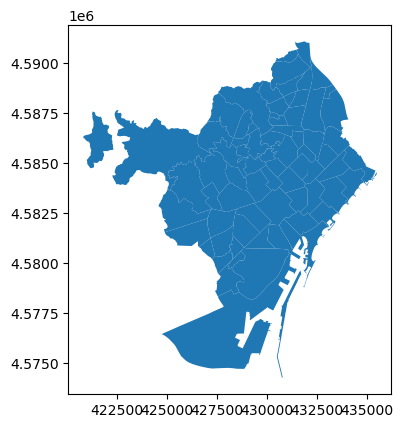

In [180]:
import geopandas as gpd
df4 = gpd.read_file('/home/luis/Documentos/python/jump2digital/data/shapefiles/bcn_barris', encoding='utf-8')
df4.plot()

In [181]:
print(type(accid["Longitud"].values))

<class 'numpy.ndarray'>


In [182]:
accid["geometry"] = gpd.points_from_xy(x=accid.Longitud.values, y=accid.Latitud.values)

ValueError: could not convert string to float: ''

In [ ]:
for index in Unknown:
    a = gpd.sjoin(accid.iloc[index],df4)
    print(a)